<a href="https://colab.research.google.com/github/janiceccc/Titanic_EDA/blob/master/Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis

### What categories of passengers were most likely to survive the Titanic disaster?

Passengers embarked at Cherbourg, with mid family size (2-4) aboard, live on mid to high level deck (B-FE), with higher Ticket class (Pclass = 1), bought high fare ticket, younger age and sex = female are more likely to survive the Titanic disaster.

### What other attributes did you use for the analysis? Explain how you used them. Provide a complete list of all attributes used.
###### You might include the following attributes in your analysis: Passenger age, Passenger gender, Cabin class the passenger travelled in (variable ‘ticket class’)

I used 'Pclass', 'Age', 'Sex', 'Fare' and 'Embarked' in the analysis.

Pclass:
There are three Pclasses. In the analysis, first get the total number of passenger in each Pclass, and the number of passenger survived in each, then calculate the survival rates.
The result indicates 62.98% 1st class passenger survided , 47.28% 2nd class passenger survived, and 24.24% third class survived, whcih indicates passengers with higer ticket class are more likely to survive.

Sex:
First get the total number of male and female passengers, and the number of male and female survivor, then calculate the survival rates.
From the result, 74.2% female survived and 18.89% male survived, which indicates females are more likely to survive.

Age:
Ages are evenly splited into 8 intervals, first get the total number of passengers in each age range, and the number of survivor in each, then calculate the survival rates.
From the result, passengers from age 0-10 has the highest survival rate, passnengers from age 70-80 has the lowest survival rate, indicates younger passengers are more likely to survive.

Fare:
Fares are evenly splited into 11 intervals. First get the total number of passengers in each fare range, and the number of survivor in each, then calculate the survival rates.
From the result, passengers paid for higher fare tickets have higher survival rate, and passengers did not paid or paid low fare tickets have the lowest survival rate, indicates passeneger paid higher fare are more likely to survive.

Embarked:
There are three embarked points, while two passengers's embarked points are unknown. First find the total number of passengers embarked from each embarked point, and the number of survivor from each, then calculate the survival rates.
From the result, 55.36% passengers embarked from Cherbourg survived, 38.96% passengers embarked from Queenstown survived, and 33.7 passengers embarked from Southampton survived, which indicates passengers embarked from Cherbourg are more likely to survive.

### Did you engineer any attributes? If yes, explain the rationale and how the new attributes were used in the analysis?
I engineered family_size_aboard, Deck, Special_title. 

family_size_aboard:
family_size_aboard is calculated by sibsp + parch + 1(passenger him/herself)
Since number of sibsp and number of parch has positive correlation to family size, therefore it is not necessary to analyze how sibsp and parch affect the survival rate separately.

In the analysis, first calculate the total number of passengers in each family size, and number of survivor, then caluclate the survival rates in each.

From the result, passengers with family size =4 has survival rate = 72.41% , passenger with family size = 2 and 3 has survival rate = 55.28%, 57.84% respectively, which indicates passengers with mid family size aboard are more likely to survive.

Deck:
The initial letter of Cabin indicates the Deck level. For passengers have more than one cabin, most of them have cabins on the same level Deck, but there are cases that cabins from different Deck too, in this case, the initial letter of each Cabin are combined to create a new Deck. Deck A is the toppest level, B is the 2nd toppest...

There are 77% Passengers has no infomation about what deck they live on, in this case, 'NA' is assigned and treated as a group. In the analysis, first calculate the total number of passengers from each deck, including NAs, and number of passengers survived, then caluclate the survival rates.

The result indicates passengers live on deck B, D, E, F, FE have survival rates greater than 74%, which are more likely to survive.

Special_title:
titles are retrieved from Passenger Names, includes ['Mr.', 'Mrs.', 'Miss.', 'Master.','Don.', 'Rev.', 'Dr.','Mme.', 'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.','Capt.', 'Countess.', 'Jonkheer.']. Titles not in [' Mr.', ' Mrs.', ' Miss.', ' Mme.', ' Ms.', ' Mlle.'] are treated as Special titles.

In the analysis, passengers are seperated into two groups, Non-Special Title and Special Title. First calcualte the total number of each group, and the number of survivors in each group, then calcualte the survival rates. From the result, 49.21% passengers with special title are survived, and 35.56% passengers with non-special title are survived, which indicates passengers with special titles are slightly more likely to survive.


### If you have excluded any attributes from the analysis, provide an explanation why you believe they can be excluded

'Ticket' is excluded in the analysis since we already have Pclass(ticket class). Since Tciket and Pclass have positive correlation, therefore, Tciket is no more to be included in the analysis.

### How did you treat missing values? Provide a detailed explanation in the comments.
Age: 
There are 19.87% passengers has unknown age. Since this is a large group, in the analysis, they are treat as an individual group, survival rate is calculated, which is 29.378%. 

Deck: 
There are 77.1% passengers has no Cabins or Cabin infomation missing. In the analysis, these passengers are treated as a group, 'NA' is assigned, which has survival rate = 29.99%. 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

file_dir = 'https://raw.githubusercontent.com/janiceccc/Titanic_EDA/master/train.csv'
read_file = pd.read_csv(file_dir,index_col=0)


In [0]:
#find the percentage of missing values/Null values in each column
read_file.isnull().sum()/read_file.Survived.count()

Survived              0.000000
Pclass                0.000000
Name                  0.000000
Sex                   0.000000
Age                   0.198653
SibSp                 0.000000
Parch                 0.000000
Ticket                0.000000
Fare                  0.000000
Cabin                 0.771044
Embarked              0.002245
Embarked_ind          0.000000
family_size_aboard    0.000000
Cabin_names           0.771044
Deck                  0.000000
Deck_ind              0.000000
title                 0.000000
Special_title         0.000000
Fare_binned           0.000000
Age_binned            0.198653
Sex_ind               0.000000
dtype: float64

   Embarked_ind  Embarked_survived  Embarked_total  Embarked_point_survival_%
0             1                 93             168                  55.357143
1             2                 30              77                  38.961039
2             3                217             644                  33.695652
3             4                  2               2                 100.000000


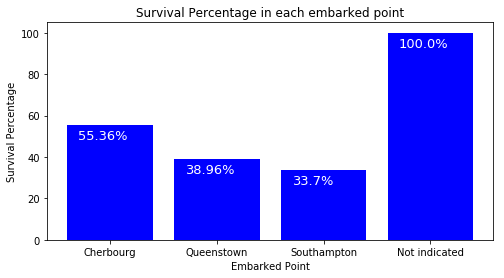

In [0]:
# Embarked points - find the survival rete of passenegers 
#    who embarked at Cherbourg(1), Queenstown(2), Southampton(3) or Not indicated(4)

#suvival passenger in each embarked point including embarked point not indicated
read_file['Embarked_ind'] = read_file.Embarked.apply(lambda x: 1 if x =='C' else(2 if x =='Q' else(3 if x=='S' else 4)))
Embarked_survival = read_file[['Embarked_ind', 'Survived']]
Embarked_survival = Embarked_survival.groupby('Embarked_ind')['Survived'].agg(sum)
Embarked_survival = Embarked_survival.reset_index()
Embarked_survival.rename(columns = {'Survived':'Embarked_survived'}, inplace =True)

#total passenger in each embarked point including embarked point not indicated
Embarked_total = read_file[['Embarked_ind', 'Survived']]
Embarked_total = Embarked_total.groupby('Embarked_ind')['Survived'].count()
Embarked_total = Embarked_total.reset_index()
Embarked_total.rename(columns = {'Survived':'Embarked_total'}, inplace =True)

#merge the two dataframe above, get the survial rate of each embarked point
Embarked_survival_percentage = pd.merge(Embarked_survival,Embarked_total)
Embarked_survival_percentage['Embarked_point_survival_%'] = Embarked_survival_percentage.Embarked_survived*100/Embarked_survival_percentage.Embarked_total
print(Embarked_survival_percentage)

#plot the bar chart with survival rate in each embarked point
fig, ax = plt.subplots(figsize=(8, 4))
width = 0.8
Embarked_plt = ax.bar(Embarked_survival_percentage.Embarked_ind, Embarked_survival_percentage['Embarked_point_survival_%'], width, color='blue', align='center')
ax.set_title('Survival Percentage in each embarked point')
plt.ylabel("Survival Percentage")
plt.xlabel("Embarked Point")
ax.set_xticks(Embarked_survival_percentage.Embarked_ind)
ax.set_xticklabels(('Cherbourg', 'Queenstown', 'Southampton','Not indicated'))

for i , j in zip(ax.patches, Embarked_survival_percentage['Embarked_point_survival_%']):
        ax.text(i.get_x()+0.1, i.get_height()-7,str(round(j,2))+'%', fontsize=13,color='white')
plt.show()
    

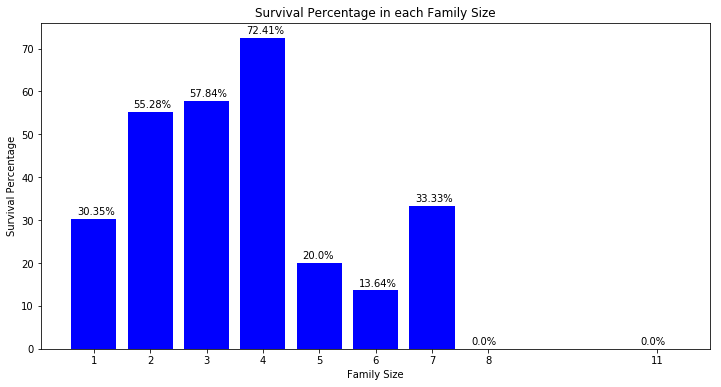

In [0]:
# Family Size - find the survival rate of passenegers in different family size
read_file['family_size_aboard'] = read_file.SibSp + read_file.Parch +1

#suvival passenger in each family size 
family_size_aboard_survived = read_file[['Survived','family_size_aboard']]
family_size_aboard_survived = family_size_aboard_survived.groupby('family_size_aboard')['Survived'].agg(sum)
family_size_aboard_survived = family_size_aboard_survived.reset_index()
family_size_aboard_survived.rename(columns = {'Survived':'family_size_aboard_suivived'}, inplace = True)

#total passenger in each family size 
family_size_aboard_total = read_file[['Survived','family_size_aboard']]
family_size_aboard_total = family_size_aboard_total.groupby('family_size_aboard')['Survived'].count()
family_size_aboard_total = family_size_aboard_total.reset_index()
family_size_aboard_total.rename(columns = {'Survived':'family_size_aboard_total'}, inplace = True)

#merge the two dataframe above, get the survial rate of family size
family_size_aboard_survival_percentage = pd.merge(family_size_aboard_survived,family_size_aboard_total)
family_size_aboard_survival_percentage['family_size_aboard_survival_%'] = family_size_aboard_survival_percentage.family_size_aboard_suivived *100/family_size_aboard_survival_percentage.family_size_aboard_total
family_size_aboard_survival_percentage

#plot the bar chart with survival rate in each family size
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.8
family_size_aboard = ax.bar(family_size_aboard_survival_percentage.family_size_aboard, family_size_aboard_survival_percentage['family_size_aboard_survival_%'], width, color='blue', align='center')
ax.set_title('Survival Percentage in each Family Size')
plt.ylabel("Survival Percentage")
plt.xlabel("Family Size")
ax.set_xticks(family_size_aboard_survival_percentage.family_size_aboard)

for i , j in zip(ax.patches, family_size_aboard_survival_percentage['family_size_aboard_survival_%']):
        ax.text(i.get_x()+0.1, i.get_height()+1, str(round(j,2))+'%', fontsize=10, color='black')

plt.show()

   Deck  deck_binned_Survived  deck_binned_Total  deck_binned_survival_%
0     A                     7                 15               46.666667
1     B                    35                 47               74.468085
2     C                    35                 59               59.322034
3     D                    25                 33               75.757576
4     E                    24                 32               75.000000
5     F                     7                  9               77.777778
6    FE                     1                  1              100.000000
7    FG                     0                  3                0.000000
8     G                     2                  4               50.000000
9     T                     0                  1                0.000000
10   NA                   206                687               29.985444


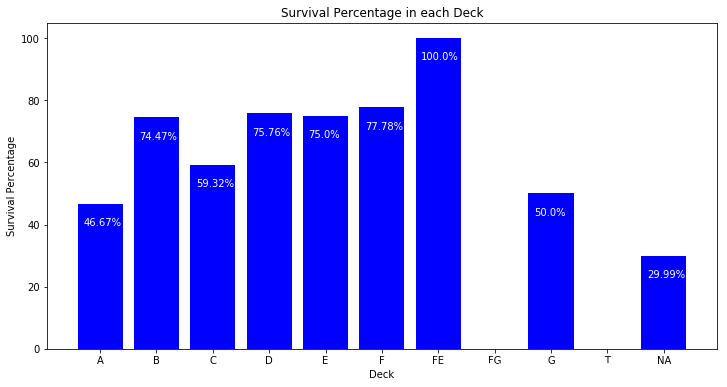

In [0]:
# Carbin - the initial letter of each carbin name indicates the Deck level
# A is the toppest deck
#find the survival rate of passenegers in each deck

#for passengers with more than one cabin, split them into a list
read_file['Cabin_names'] = read_file.Cabin.apply(lambda x: re.split(' ', x) if pd.notnull(x) else x)

#get the intial letter of each carbin to get the deck
#if a passenger has two or more cabins that intial letters are different, combine the intial letters to create a new deck
def get_deck(x):
    deck = []
    for d in x:
        if len(deck) == 0:
            deck.append(d[0])
        elif len(deck) > 0 and d[0] not in deck:
            deck.append(d[0])
        else:
            pass
    
    if len(deck) ==1:
        return deck[0]
    else:     
        combined_deck = ''
        for i in deck:
            combined_deck += i
    return combined_deck

#for passengers with no cabin/ cabin not indicated, assign 'NA'
read_file['Deck'] = read_file.Cabin_names.apply(lambda x : get_deck(x) if np.all(pd.notnull(x)) else 'NA' )

deck_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F':6,'FE':7,'FG':8,'G':9,'T':10, 'NA':11}
read_file['Deck_ind'] = read_file['Deck'].map(deck_mapping)
 
#passengers survived in each deck
deck_binned_survival = read_file[['Deck_ind','Survived']].groupby(['Deck_ind'])['Survived'].agg(sum)
deck_binned_survival = deck_binned_survival.reset_index()
deck_binned_survival.rename(columns = {'Survived': 'deck_binned_Survived'}, inplace = True)

#total passengers in each deck
deck_binned_total = read_file[['Deck_ind','Survived']].groupby(['Deck_ind'])['Survived'].count()
deck_binned_total = deck_binned_total.reset_index()
deck_binned_total.rename(columns = {'Survived': 'deck_binned_Total'}, inplace = True)

#merge the dataframes above to get survival rate in each deck
deck_binned_survival_percentage = pd.merge(deck_binned_survival,deck_binned_total, on='Deck_ind')
deck_binned_survival_percentage['deck_binned_survival_%'] = deck_binned_survival_percentage.deck_binned_Survived*100/deck_binned_survival_percentage.deck_binned_Total
deck_mapping_reversed = {1: 'A', 2:'B', 3:'C', 4:'D', 5:'E', 6:'F',7:'FE',8:'FG',9:'G',10:'T', 11:'NA'}
deck_binned_survival_percentage['Deck'] = deck_binned_survival_percentage['Deck_ind'].map(deck_mapping_reversed)

print(deck_binned_survival_percentage[['Deck','deck_binned_Survived','deck_binned_Total','deck_binned_survival_%']])

#plot the bar chart with survival rate in each deck
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.8
deck_binned = ax.bar(deck_binned_survival_percentage.Deck_ind, deck_binned_survival_percentage['deck_binned_survival_%'] , width, color='blue', align='center')
ax.set_title('Survival Percentage in each Deck')
plt.ylabel("Survival Percentage")
plt.xlabel("Deck")
ax.set_xticks(deck_binned_survival_percentage.Deck_ind)
ax.set_xticklabels(deck_binned_survival_percentage.Deck)

for i , j in zip(ax.patches, deck_binned_survival_percentage['deck_binned_survival_%']):
        ax.text(i.get_x()+0.1, i.get_height()-7,str(round(j,2))+'%', fontsize=10, color='white')

plt.show()

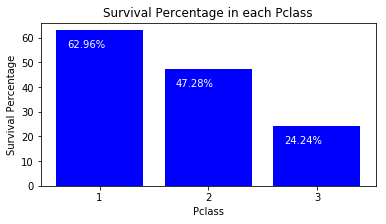

In [0]:
#Pclass - Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
#get the survival rate in each Pclass

#passengers survived in each Pclass
Pclass_survived = read_file[['Pclass','Survived']]
Pclass_survived = Pclass_survived.groupby('Pclass')['Survived'].agg(sum)
Pclass_survived = Pclass_survived.reset_index()
Pclass_survived.rename(columns = {'Survived':'Pclass_Survived'}, inplace = True)

#total passengers ib each Pclass
Pclass_total = read_file[['Pclass','Survived']]
Pclass_total = Pclass_total.groupby('Pclass')['Survived'].count()
Pclass_total = Pclass_total.reset_index()
Pclass_total.rename(columns = {'Survived':'Pclass_Total'}, inplace = True)

#merge the dataframes above and get the survival rate
Pclass_survival_percentage = pd.merge(Pclass_survived,Pclass_total)
Pclass_survival_percentage['Pclass_survival_%'] = Pclass_survival_percentage.Pclass_Survived*100/Pclass_survival_percentage.Pclass_Total

#plot the bar chart with survial rate in each Pclass
fig, ax = plt.subplots(figsize=(6, 3))
width = 0.8
Plass = ax.bar(Pclass_survival_percentage.Pclass, Pclass_survival_percentage['Pclass_survival_%'] , width, color='blue', align='center')
ax.set_title('Survival Percentage in each Pclass')
plt.ylabel("Survival Percentage")
plt.xlabel("Pclass")
ax.set_xticks(Pclass_survival_percentage.Pclass)
ax.set_xticklabels(Pclass_survival_percentage.Pclass)

for i , j in zip(ax.patches, Pclass_survival_percentage['Pclass_survival_%']):
        ax.text(i.get_x()+0.1, i.get_height()-7,str(round(j,2))+'%', fontsize=10, color='white')

plt.show()


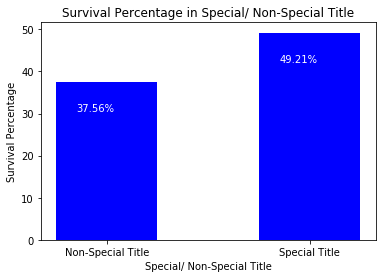

In [0]:
#title of each passenger Non-Special Title: 0, Special Title: 1
#find the survival rate of passengers with Special Title and Non-Special Title

#get the title of each passenger
read_file['title'] = read_file.Name.apply(lambda x: re.search(' [a-zA-Z]+\.', x).group() if re.search(' [a-zA-Z]+\.', x) else None)

#Non-Special Title: 0, Special Title: 1
read_file['Special_title'] = read_file.title.apply(lambda x : 0 if x in [' Mr.', ' Mrs.', ' Miss.', ' Mme.', ' Ms.', ' Mlle.'] else 1)

#survival passengers with Special Title and Non-Special Title
special_title_survival = read_file[['Survived','Special_title']]
special_title_survival = special_title_survival.groupby('Special_title')['Survived'].agg(sum)
special_title_survival = special_title_survival.reset_index()
special_title_survival.rename(columns = {'Survived':'Special_title_survived'}, inplace = True)

#total passengers with Special Title and Non-Special Title
special_title_total = read_file[['Survived','Special_title']]
special_title_total = special_title_total.groupby('Special_title')['Survived'].count()
special_title_total = special_title_total.reset_index()
special_title_total.rename(columns = {'Survived':'Special_title_total'}, inplace = True)

#merge the dataframes above and get the survival rate
special_title_survival_percentage = pd.merge(special_title_survival,special_title_total)
special_title_survival_percentage['Special_title_survived_%'] = special_title_survival_percentage.Special_title_survived*100/special_title_survival_percentage.Special_title_total
special_title_survival_percentage

#plot the bar chart with survial rate of passengers with non-special title, and special title
fig, ax = plt.subplots(figsize=(6, 4))
width = 0.5
Plass = ax.bar(special_title_survival_percentage.Special_title, special_title_survival_percentage['Special_title_survived_%'] , width, color='blue', align='center')
ax.set_title('Survival Percentage in Special/ Non-Special Title')
plt.ylabel("Survival Percentage")
plt.xlabel("Special/ Non-Special Title")
ax.set_xticks(special_title_survival_percentage.Special_title)
ax.set_xticklabels(('Non-Special Title','Special Title'))

for i , j in zip(ax.patches, special_title_survival_percentage['Special_title_survived_%']):
        ax.text(i.get_x()+0.1, i.get_height()-7,str(round(j,2))+'%', fontsize=10, color='white')
plt.show()

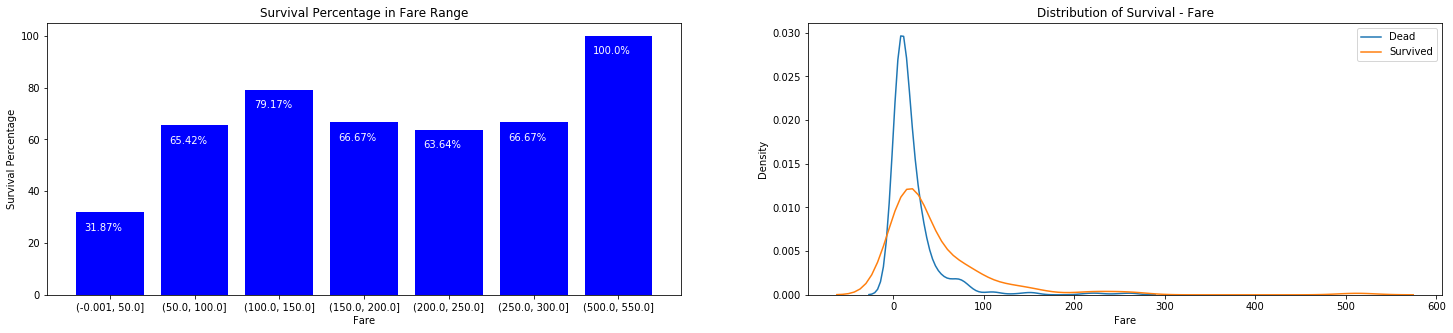

In [0]:
#Fare - find the survival rate of passenger in each fare range

#split the fare in 11 intervals
read_file['Fare_binned'] = pd.cut(read_file['Fare'], bins = np.linspace(0, 550, num = 12),include_lowest=True)

#total passengers in each fare interval
fare_binned_total = read_file.groupby('Fare_binned')['Survived'].count()
fare_binned_total = fare_binned_total.reset_index()
fare_binned_total.rename(columns={"Survived": "Total_passenger"}, inplace = True)
fare_binned_total

#passenger survived in each fare interval
fare_binned_survived = read_file.groupby('Fare_binned')['Survived'].agg('sum')
fare_binned_survived = fare_binned_survived.reset_index()
fare_binned_survived.rename(columns={"Survived": "Total_survived_passenger"}, inplace = True)
fare_binned_survived

#merge the dataframes above and get the survival rate
fare_binned_survival_percentage = pd.merge(fare_binned_total,fare_binned_survived)
fare_binned_survival_percentage['Survival_%'] = fare_binned_survival_percentage.Total_survived_passenger*100/fare_binned_survival_percentage.Total_passenger
fare_binned_survival_percentage = fare_binned_survival_percentage.loc[:][~fare_binned_survival_percentage['Survival_%'].isnull()]
fare_binned_survival_percentage

#plot the bar chart with survial rate in each fare range, and the KDE(kernel density estimate) chart
f = plt.figure(figsize=(25,5))

ax = f.add_subplot(121)
x = list(range(1, fare_binned_survival_percentage.shape[0]+1))
width = 0.8
fare_binned = ax.bar(x, fare_binned_survival_percentage['Survival_%'] , width, color='blue', align='center')
ax.set_title('Survival Percentage in Fare Range')
plt.ylabel("Survival Percentage")
plt.xlabel("Fare")
ax.set_xticks(x)
ax.set_xticklabels(fare_binned_survival_percentage.Fare_binned)
for i , j in zip(ax.patches, fare_binned_survival_percentage['Survival_%']):
        ax.text(i.get_x()+0.1, i.get_height()-7,str(round(j,2))+'%', fontsize=10, color='white')
        
ax2 = f.add_subplot(122)
sns.kdeplot(read_file.loc[read_file['Survived'] == 0,'Fare'], label = 'Dead')
sns.kdeplot(read_file.loc[read_file['Survived'] == 1,'Fare'], label = 'Survived')
plt.xlabel('Fare'); plt.ylabel('Density'); plt.title('Distribution of Survival - Fare')

plt.show()

In [0]:
#survival rate for passenger whose age is unknown
read_file['Survived'][read_file['Age'].isnull()].sum()*100/read_file['Survived'][read_file['Age'].isnull()].count()

29.37853107344633

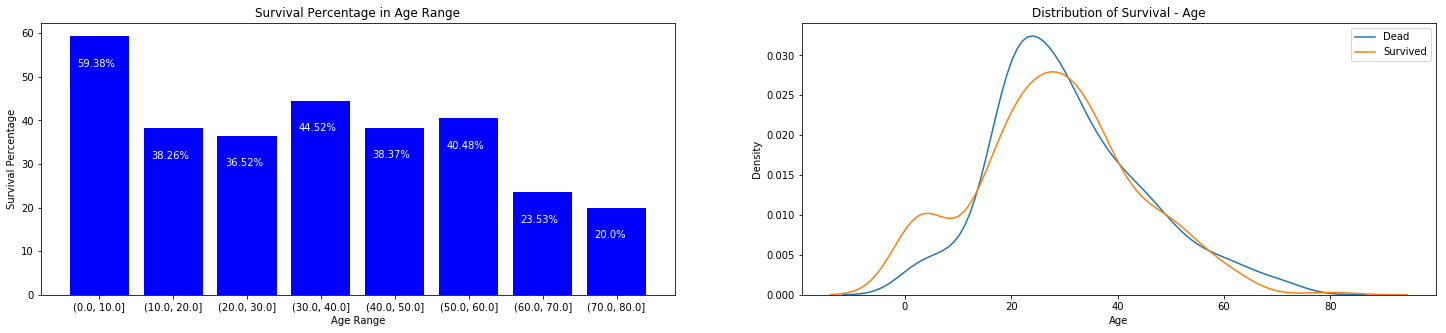

In [0]:
#Age - find the survival rate in each age range

#split the age into 8 intervals
read_file['Age_binned'] = pd.cut(read_file['Age'], bins = np.linspace(0, 80, num = 9),include_lowest=False)

#passenger survived in each age range
Age_binned_survivor = read_file.groupby('Age_binned')['Survived'].agg('sum')
Age_binned_survivor = Age_binned_survivor.reset_index()
Age_binned_survivor.rename(columns={"Survived": "Total_survival"}, inplace = True)

#total passenger in each age range
Age_binned_total = read_file.groupby('Age_binned')['Survived'].count()
Age_binned_total = Age_binned_total.reset_index()
Age_binned_total.rename(columns={"Survived": "Total_passenger"}, inplace = True)

#merge the dataframe above and get the survival rate
Age_binned_survival_percentage = pd.merge(Age_binned_survivor,Age_binned_total)
Age_binned_survival_percentage['Total_Survival_%'] = Age_binned_survival_percentage.Total_survival*100/Age_binned_survival_percentage.Total_passenger

#plot the bar chart with survial rate each age range, and the KDE(kernel density estimate) chart
f = plt.figure(figsize=(25,5))

ax = f.add_subplot(121)
x = list(range(1, Age_binned_survival_percentage.shape[0]+1))
width = 0.8  
ax.bar(x, Age_binned_survival_percentage['Total_Survival_%'] , width, color='blue', align='center',label='All')
ax.set_title('Survival Percentage in Age Range')
plt.ylabel("Survival Percentage")
plt.xlabel("Age Range")
ax.set_xticks(x)
ax.set_xticklabels(Age_binned_survival_percentage.Age_binned)

for i , j in zip(ax.patches, Age_binned_survival_percentage['Total_Survival_%']):
        ax.text(i.get_x()+0.1, i.get_height()-7, str(round(j,2))+'%', fontsize=10, color='white')

ax2 = f.add_subplot(122)
sns.kdeplot(read_file.loc[read_file['Survived'] == 0,'Age'][~read_file['Age'].isnull()], label = 'Dead')
sns.kdeplot(read_file.loc[read_file['Survived'] == 1,'Age'][~read_file['Age'].isnull()], label = 'Survived')
plt.xlabel('Age'); plt.ylabel('Density'); plt.title('Distribution of Survival - Age')

plt.show()

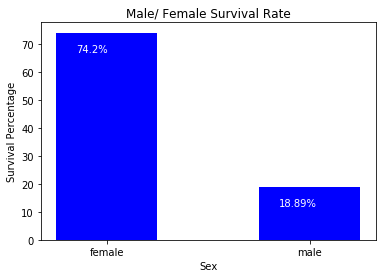

In [0]:
#Sex - find the male and female survival rate

#male and female survivor
sex_survival = read_file.groupby('Sex')['Survived'].agg('sum')
sex_survival = sex_survival.reset_index()
sex_survival.rename(columns={"Survived": "Sex_survival"}, inplace = True)

#total male and female passenger
sex_total = read_file.groupby('Sex')['Survived'].count()
sex_total = sex_total.reset_index()
sex_total.rename(columns={"Survived": "Total_passenger_Sex"}, inplace = True)

#merge the dataframe above and get the survival rate
sex_survival_percentage = pd.merge(sex_survival,sex_total)
sex_survival_percentage['Survival_%'] = sex_survival_percentage.Sex_survival*100/sex_survival_percentage.Total_passenger_Sex

#plot the bar chart with male and female survial rate
fig, ax = plt.subplots(figsize=(6, 4))
width = 0.5
Plass = ax.bar(sex_survival_percentage.Sex, sex_survival_percentage['Survival_%'] , width, color='blue', align='center')
ax.set_title('Male/ Female Survival Rate')
plt.ylabel("Survival Percentage")
plt.xlabel("Sex")
ax.set_xticks(sex_survival_percentage.Sex)
ax.set_xticklabels(sex_survival_percentage.Sex)

for i , j in zip(ax.patches, sex_survival_percentage['Survival_%']):
        ax.text(i.get_x()+0.1, i.get_height()-7,str(round(j,2))+'%', fontsize=10, color='white')
plt.show()

In [0]:
#assign indicators to Sex, 0 if is male, 1 if is female, 2 if is unknown
read_file['Sex_ind'] = read_file['Sex'].apply(lambda x: 0 if x =='male' else(1 if x =='female' else 2))

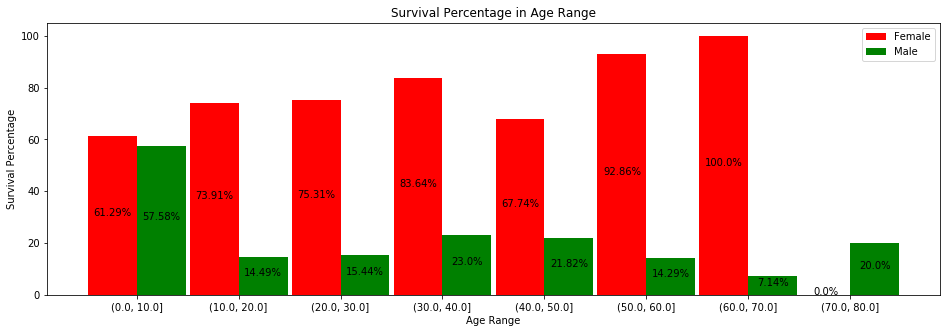

In [0]:
#Survival Rate in each Age range for Male and Female
Sex_Age_binned = pd.get_dummies(read_file[['Survived','Sex','Age']])
Sex_Age_binned['Age_binned'] = pd.cut(Sex_Age_binned['Age'], bins = np.linspace(0, 80, num = 9),include_lowest=False)
num_pesenger_Age_binned = Sex_Age_binned.groupby(['Age_binned',])[['Sex_female','Sex_male']].sum()
num_pesenger_Age_binned = num_pesenger_Age_binned.reset_index()

#total female passengers in each age range
female_survivor = Sex_Age_binned[['Age_binned','Survived','Sex_female']][Sex_Age_binned.Sex_female ==1]
female_survivor = female_survivor.groupby(['Age_binned',])[['Survived']].sum()
female_survivor = female_survivor.reset_index()
female_survivor.rename(columns = {'Survived':'female_Survived'}, inplace = True)

#total male passengers in each age range
male_survivor = Sex_Age_binned[['Age_binned','Survived','Sex_male']][Sex_Age_binned.Sex_male ==1]
male_survivor = male_survivor.groupby(['Age_binned',])[['Survived']].sum()
male_survivor = male_survivor.reset_index()
male_survivor.rename(columns = {'Survived':'male_Survived'}, inplace = True)


#merge the dataframes above
male_female_survived_age_binned = pd.merge(pd.merge(num_pesenger_Age_binned, female_survivor),male_survivor)

#get the male and female survival rate in each age range
male_female_survived_age_binned['female_Survived_%'] = male_female_survived_age_binned.female_Survived*100/male_female_survived_age_binned.Sex_female
male_female_survived_age_binned['male_Survived_%'] = male_female_survived_age_binned.male_Survived*100/male_female_survived_age_binned.Sex_male

#there is no female passengers in age range (70.0, 80.0] 
#in order to plot the bar chart with male and female survival rate (null value not allowed)
#I replace the Null value with 0
male_female_survived_age_binned['female_Survived_%'] = male_female_survived_age_binned['female_Survived_%'].fillna(value=0)
male_female_survived_age_binned

#plot the bar chart with survial rate of female and male in different age range 
width = 0.48    
fig = plt.figure(figsize=(16, 5))
ax = plt.subplot(111)
x = np.arange(male_female_survived_age_binned.shape[0])

ax.bar(x-0.24, male_female_survived_age_binned['female_Survived_%'],width, color='red',align='center',label='Female')
ax.bar(x+0.24, male_female_survived_age_binned['male_Survived_%'], width, color='green', align='center',label='Male')
ax.legend(["Female", "Male"]);

ax.set_title('Survival Percentage in Age Range')
plt.ylabel("Survival Percentage")
plt.xlabel("Age Range")
ax.set_xticks(x)
ax.set_xticklabels(male_female_survived_age_binned.Age_binned)

for patch in ax.patches:
    bl = patch.get_xy()
    x = 0.5 * patch.get_width() + bl[0]
    y = 0.5 * patch.get_height() + bl[1] 
    ax.text(x,y, str(round(patch.get_height(),2)) +'%', fontsize=10, ha='center')

plt.show()


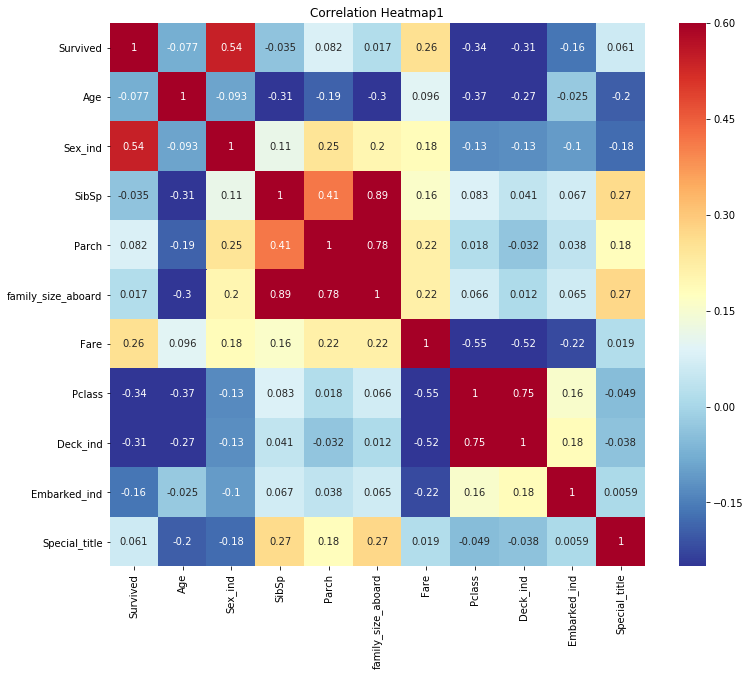

In [0]:
#correlations between Survival and factors
corr1 = read_file[['Survived', 'Age','Sex_ind', 'SibSp', 'Parch','family_size_aboard','Fare','Pclass','Deck_ind','Embarked_ind','Special_title']]
data_corr1 = corr1.corr()

# Heatmap of correlations
plt.figure(figsize = (12, 10))
sns.heatmap(data_corr1, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap1');


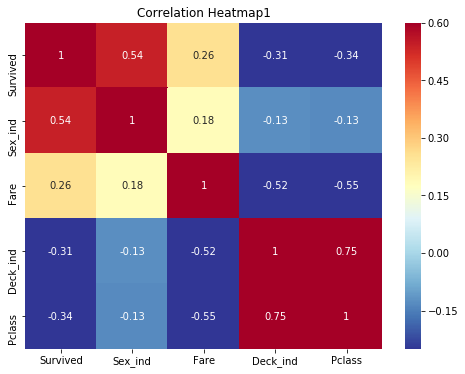

In [0]:
#plot the Heatmap of factors that has significate correlations with survival
corr2 = read_file[['Survived','Sex_ind','Fare', 'Deck_ind','Pclass']]
data_corr2 = corr2.corr()

# Heatmap of correlations
plt.figure(figsize = (8, 6))
sns.heatmap(data_corr2, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap1');